In [0]:
#PREDICTING GENRE OF THE MOVIES/SERIES FROM THE IMAGES - Multi Label Image Classification.

In [0]:
#When we can classify an image into more than one class, it is known as a multi-label image classification problem.
#We have 2 datasets here, one is having 7000+ images(posters) of movies, series. The other dataset is a CSV file which is having the genre of these posters,
#The ID mentioned in the CSV file is same as the image in the in Image folder. Each images having unique names which matches with the ID in the csv sheet.
#So we are training these images along with the csv file which contains the Genre of each posters.
#Once the training and model is ready we are predicting the Genre of new posters which we are giving as input.

In [0]:
#Importing all the necessary libraries.

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

Using TensorFlow backend.


In [0]:
import os

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
os.listdir('/content/drive/My Drive/Multi_Label_dataset')

['train.csv', 'Images', 'Images 2']

In [0]:
train = pd.read_csv('/content/drive/My Drive/Multi_Label_dataset/train.csv')    # reading the csv file
train.head()      # printing first five rows of the file

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
#Reading the images from Image folder with size (128,128,3), mapping those images to the scv file with the Id names.
#Its better to read the image with (224,224,3) or (400,400,3) as target size. I have limitation in RAM and it was throwing error, so i have to reduce 
#the size

In [0]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('/content/drive/My Drive/Multi_Label_dataset/Images/'+train['Id'][i]+'.jpg',target_size=(128,128,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 7254/7254 [1:05:31<00:00,  1.84it/s]


In [0]:
X.shape

(7254, 128, 128, 3)

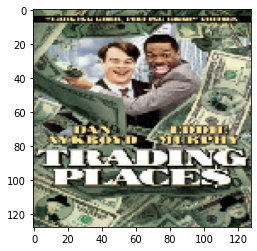

In [0]:
plt.imshow(X[2])

In [0]:
train['Genre'][2]

"['Comedy']"

In [0]:
y = np.array(train.drop(['Id', 'Genre'],axis=1))
y.shape

(7254, 25)

In [0]:
#creating validation set

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1) #validation set

In [0]:
#Introducing neural network
#The output layer will have 25 neurons (equal to the number of genres) and we’ll use sigmoid as the activation function

In [0]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

In [0]:
model.summary()

In [0]:
#For compiling the model I’ll use binary_crossentropy as the loss function and ADAM as the optimizer

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
#Fitting the model

In [0]:
model.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test), batch_size=64)

In [0]:
#our model is ready
#Now we can make prediction, for that we need to preprocess these images using the same steps we saw earlier
#Predicting teh Genre of GOT series poster
#In the prediction we can see 3 labels with the probablity, the highest probabilty label will be the most accurate one.

In [0]:
img = image.load_img('/content/drive/My Drive/Multi_Label_dataset/Images 2/GOT.jpg',target_size=(128,128,3))
img = image.img_to_array(img)
img = img/255

In [0]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,128,128,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [0]:
#predicting Genre of Golmaal movie poster
##In the prediction we can see 3 labels with the probablity, the highest probabilty label will be the most accurate one.

In [0]:
img = image.load_img('/content/drive/My Drive/Multi_Label_dataset/Images 2/golmal.jpeg',target_size=(128,128,3))
img = image.img_to_array(img)
img = img/255

In [0]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,128,128,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)